# 零售企业销售数据分析

<font size=5>一、数据处理</font>

<font size=4>1.导入销售数据</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
from pandas import read_csv
data1=pd.read_csv('marketbasket.csv', encoding="gbk")
data2=pd.read_csv('marketitem.csv', encoding="gbk")

<font size=4>2.查看数据前5行</font>

In [2]:
print(data1.head(5))
print(data2.head(5))

  SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND
0    2018-06-01       D007       3     250458         8.0
1    2018-06-01       D007       3     250200        32.7
2    2018-06-01       D007       1     161068        16.8
3    2018-06-01       D007       8       5325        30.4
4    2018-06-01       D007       8       5361       191.3
        SDATE STORE_CODE  POSID  BASK_CODE  PROD_CODE  ITEM_QUANTITY  \
0  2018-06-01       D007      3     250451      29405          1.000   
1  2018-06-01       D007      3     250451      13187          1.000   
2  2018-06-01       D007      3     250243     196249          1.000   
3  2018-06-01       D007      3     250243     199637          1.000   
4  2018-06-01       D007      1     160905     195012          3.222   

   ITEM_SPEND  NORMAL_PRICE DISCOUNT_TYPE  DISCOUNT_AMOUNT  
0        1.70           2.0             m             -0.3  
1        1.00           1.0             n              0.0  
2       99.00          99.0         

<font size=4>3.查看数据基本情况</font>

In [3]:
data1.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [4]:
data2.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02


<font size=4>4.查看数据类型</font>

In [5]:
data1.dtypes

SHOP_DATETIME     object
STORE_CODE        object
POS_NO             int64
BASK_CODE          int64
BASK_SPEND       float64
dtype: object

In [6]:
data2.dtypes

SDATE               object
STORE_CODE          object
POSID                int64
BASK_CODE            int64
PROD_CODE            int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE       object
DISCOUNT_AMOUNT    float64
dtype: object

<font size=4>5.检查是否有缺失值</font>

In [7]:
print(data1.isnull().any())
print("*"*30)
print(data2.isnull().any())

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool
******************************
SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool


<font size=5>二、统计分析</font>

<font size=4>1.统计各个门店的销售额并可视化呈现</font>

In [8]:
mdsale1 =data1.groupby(by="STORE_CODE")
sell_groupby_STORE_CODE = mdsale1["BASK_SPEND"].sum()
sell_groupby_STORE_CODE

STORE_CODE
A001    3.435303e+06
A004    5.123467e+05
A006    9.383050e+05
A007    6.866382e+05
A008    1.311171e+06
A009    7.977389e+05
A010    6.448924e+05
A012    8.469747e+05
A013    1.117126e+06
A016    7.398143e+05
A017    3.945074e+05
A018    5.584417e+05
A019    6.486686e+05
A021    7.387401e+05
A022    4.874459e+05
D002    3.129447e+06
D003    2.435843e+05
D004    8.078603e+05
D005    5.541030e+05
D006    7.935042e+05
D007    1.361607e+06
D008    6.930078e+05
D009    4.704280e+05
D010    3.636179e+05
Name: BASK_SPEND, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

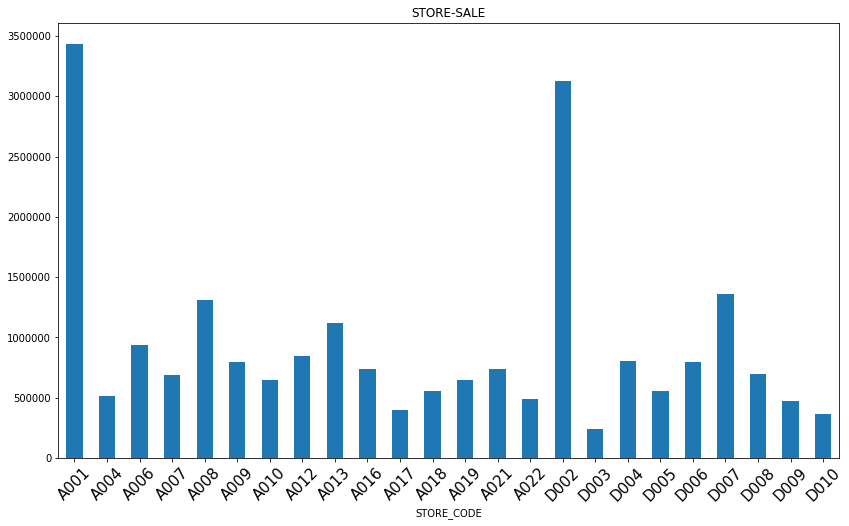

In [9]:
sell_groupby_STORE_CODE.plot(kind='bar',title='STORE-SALE',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

<font size=4>2.统计各个门店的让利情况并可视化呈现</font>

In [10]:
rlqk =data2.groupby(by="STORE_CODE")
rl_groupby_STORE_CODE = rlqk["DISCOUNT_AMOUNT"].sum()
rl_groupby_STORE_CODE

STORE_CODE
A001   -454457.05
A004    -58657.79
A006   -115700.27
A007    -78634.92
A008   -138164.49
A009    -81139.40
A010    -73648.42
A012   -116310.50
A013   -135125.86
A016    -78571.15
A017    -47831.54
A018    -68675.89
A019    -80341.30
A021    -77323.69
A022    -45195.82
D002   -465244.61
D003    -23871.27
D004   -109239.76
D005    -77246.94
D006    -84627.86
D007   -215108.26
D008    -90824.42
D009    -49390.58
D010    -49074.50
Name: DISCOUNT_AMOUNT, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

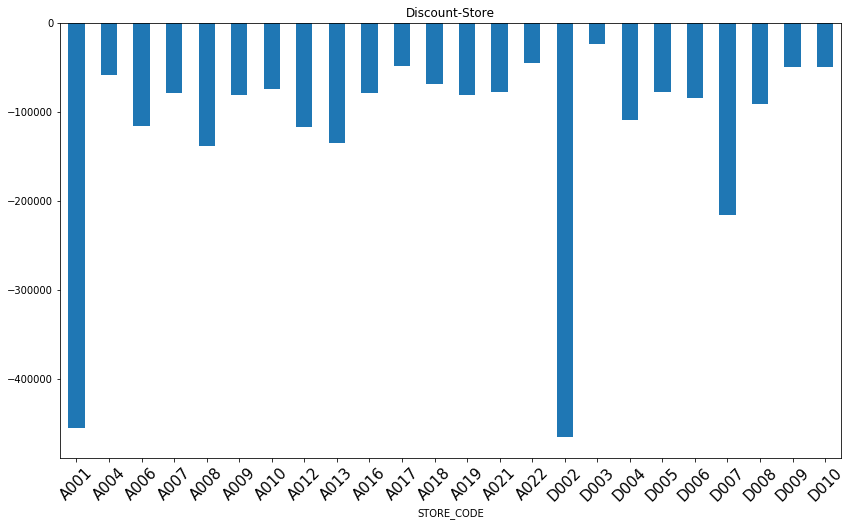

In [11]:
rl_groupby_STORE_CODE.plot(kind='bar',title='Discount-Store',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

<font size=4>3.单品数量与销量排行</font>

In [13]:
prod = list(data2['PROD_CODE'].unique())
len(prod)

19271

In [14]:
prank= pd.DataFrame(data2['PROD_CODE'].value_counts())
prank

,PROD_CODE
205540,12622
21835,10459
194690,9548
72811,7747
178462,7373
197532,7289
205437,6725
1557,6041
109584,5932
216571,5675


In [19]:
phead10=prank.head(10)
phead10

,PROD_CODE
205540,12622
21835,10459
194690,9548
72811,7747
178462,7373
197532,7289
205437,6725
1557,6041
109584,5932
216571,5675


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

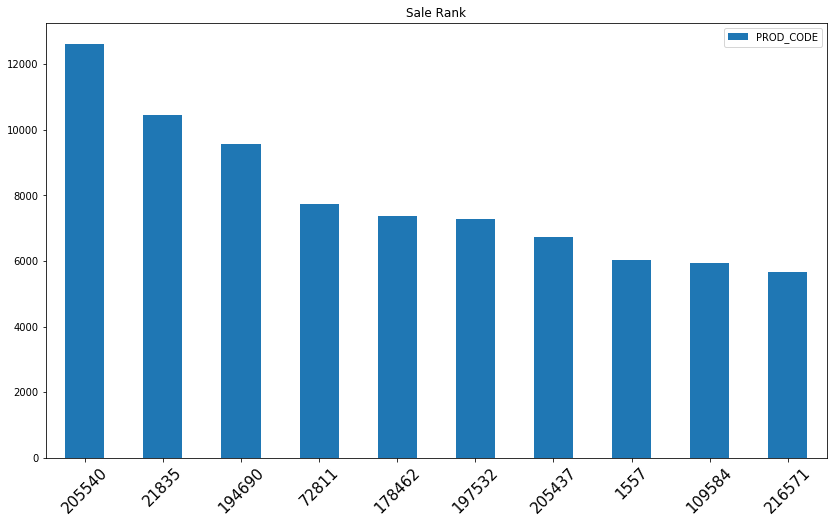

In [20]:
phead10.plot(kind='bar',title='Sale Rank',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

<font size=4>4.折扣分析</font>

In [21]:
zk = list(data2['DISCOUNT_TYPE'].unique())
len(zk)

9

In [22]:
zkrank= pd.DataFrame(data2['DISCOUNT_TYPE'].value_counts())
zkrank

,DISCOUNT_TYPE
n,1206812
p,354010
m,153875
v,11851
x,4530
q,1458
Z,202
s,22
h,1


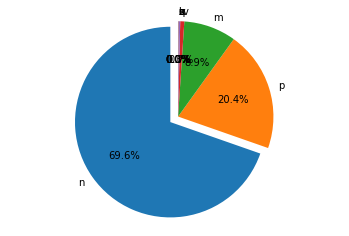

In [24]:
labels = 'n','p','m','v','x','q','z','s','h'
sizes = [1206812,354010,153875,11851,4530,1458,202,22,1]
explode = (0.1,0,0,0,0,0,0,0,0) #0.1表示将Hogs那一块凸显出来
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90)
plt.axis('equal') 
plt.show()

<font size=4>5.门店销售趋势分析</font>

In [36]:
A=data2.loc[data2['STORE_CODE'].str.contains('A')]
STORE_A = list(A['STORE_CODE'].unique())

typea=A[['SDATE','ITEM_SPEND']].groupby('SDATE').sum()
typea.rename(columns={'ITEM_SPEND':'A_SPEND'}, inplace = True)
typea

,A_SPEND
SDATE,
2018-06-01,364989.76
2018-06-02,349976.39
2018-06-03,335601.68
2018-06-04,244125.78
2018-06-05,292044.01
2018-06-06,320429.06
2018-06-07,265902.23
2018-06-08,362782.56
2018-06-09,445550.68


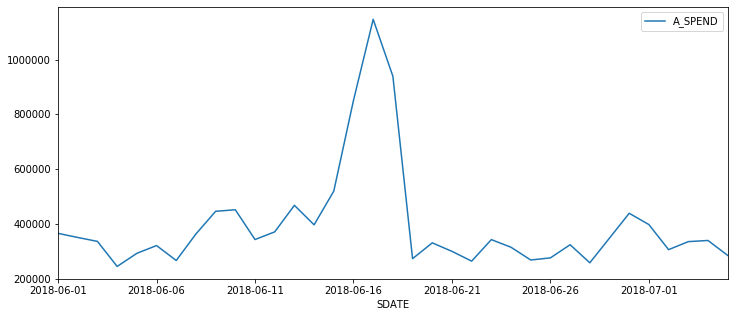

In [37]:
plt.rcParams['figure.figsize'] = (12.0, 5.0)
typea.plot()
plt.show()

In [38]:
D=data2.loc[data2['STORE_CODE'].str.contains('D')]
STORE_D = list(D['STORE_CODE'].unique())

typed=D[['SDATE','ITEM_SPEND']].groupby('SDATE').sum()
typed.rename(columns={'ITEM_SPEND':'D_SPEND'}, inplace = True)
typed

,D_SPEND
SDATE,
2018-06-01,352337.52
2018-06-02,377933.77
2018-06-03,347178.07
2018-06-04,313687.27
2018-06-05,371350.80
2018-06-06,177821.65
2018-06-07,170206.96
2018-06-08,201619.71
2018-06-09,234078.80


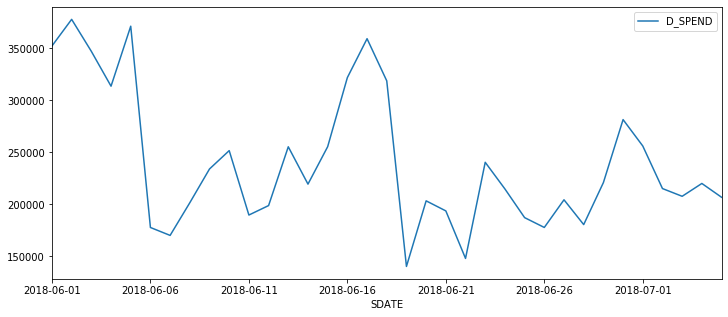

In [39]:
plt.rcParams['figure.figsize'] = (12.0, 5.0)
typed.plot()
plt.show()

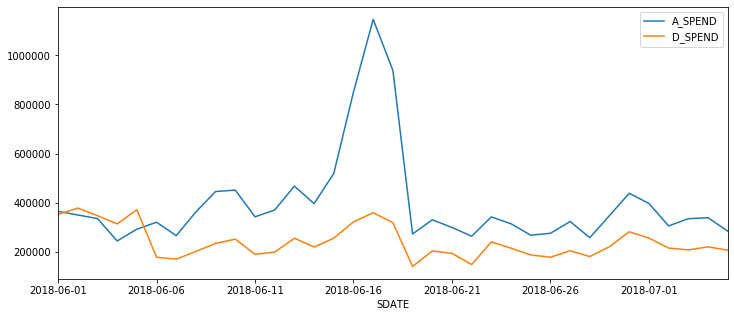

In [40]:
AD=pd.merge(typea,typed,on='SDATE')

plt.rcParams['figure.figsize'] = (12.0, 5.0)
AD.plot()
plt.show()

<font size=4>6.门店商品动销情况分析</font>

In [46]:
dx=data2[['PROD_CODE','ITEM_QUANTITY',]].groupby('PROD_CODE').sum()
dxtop10=dx.sort_values(ascending=False,by='ITEM_QUANTITY').head(10)
dxtop10

,ITEM_QUANTITY
PROD_CODE,
149413,39823.000
86772,31252.000
220834,25644.000
7133,23015.000
61623,21756.000
124556,19887.000
205540,19302.000
1152,19135.000
194690,18101.534


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

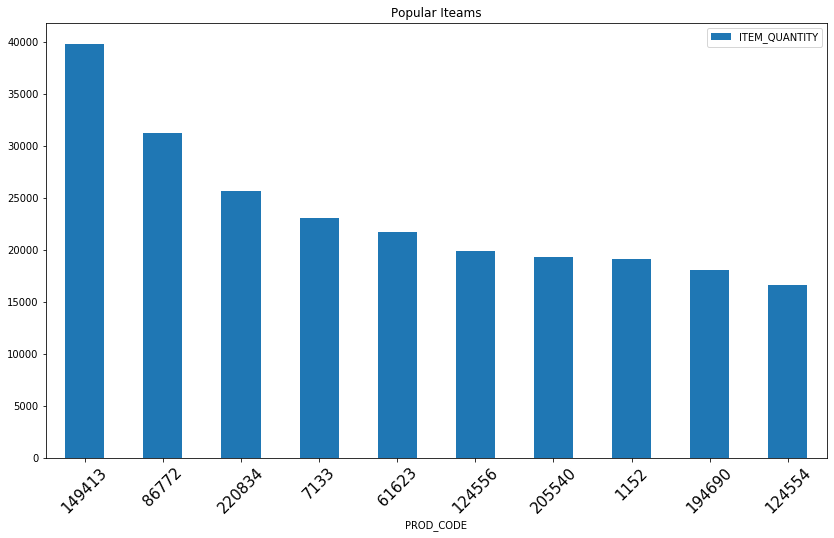

In [47]:
dxtop10.plot(kind='bar',title='Popular Iteams',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

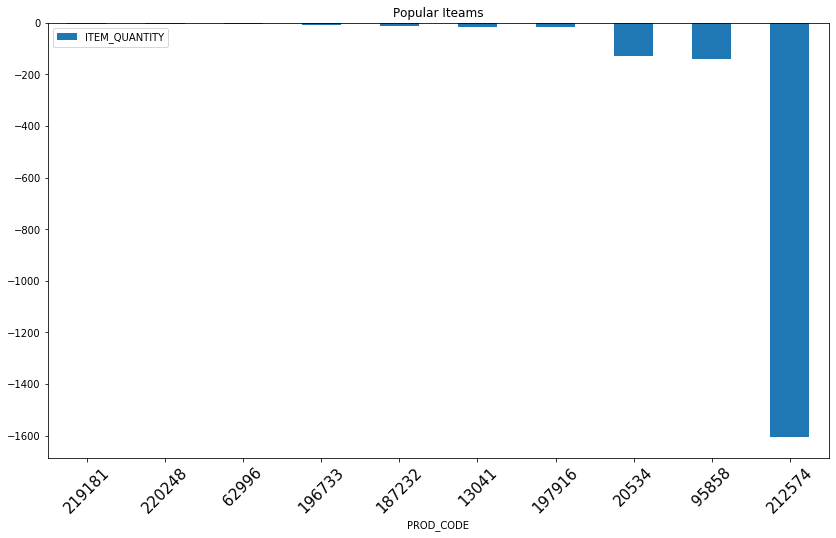

In [48]:
dxtail=dx.sort_values(ascending=False,by='ITEM_QUANTITY').tail(10)
dxtail.plot(kind='bar',title='Popular Iteams',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

<font size=5>三、总结</font>

<font size=4>综合上述数据分析，可以对不同门类商品的销售情况进行分析。从商品、消费者等多个维度可以看到不同的分析结果。综合运用数据分析结论及其数据的可视化显示可以帮助企业进行管理决策。通过对日常经营活动的管理可以进一步提高效率，获取更高的收益。</font>